In [15]:
import pandas as pd
import numpy as np
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [16]:
def apply_statistics(branches, files, num_PCs):
    new_csv=files[0].copy()
    new_csv.pop('Unnamed: 0')
    for branch in branches:
        all_scores=np.zeros(tuple((num_PCs, np.shape(files[0])[0])))
        for example in range(len(files)):
            all_scores[example]=files[example][branch]
        col_index=new_csv.columns.get_loc(branch)
        new_csv[branch]=np.mean(all_scores, axis=0)
        new_csv.insert(col_index+1, branch+' Std', np.std(all_scores, axis=0))
        new_csv.insert(col_index+1, branch+' Max', np.max(all_scores, axis=0))
        new_csv.insert(col_index+1, branch+' Min', np.min(all_scores, axis=0))
        new_csv.insert(col_index+1, branch+' Med', np.median(all_scores, axis=0))
        new_csv.insert(col_index+1, branch+' Mean+Std', np.mean(all_scores, axis=0)+np.std(all_scores, axis=0))
        new_csv.insert(col_index+1, branch+' Mean-Std', np.mean(all_scores, axis=0)-np.std(all_scores, axis=0))
    return new_csv



def evaluate_mean(csv, branches):
    reduced_csv=csv
    branch_explanation=np.zeros([len(branches), len(csv)])
    for i in range(len(branches)):
        branch_explanation[i]=(reduced_csv[branches[i]]<-0.5)
    branch_explanation=np.moveaxis(branch_explanation, 0, -1)
    
    mean_dict={'target_id': csv['target_id'], 'tce_plnt_num': csv['tce_plnt_num'], 'original_label':csv['original_label'],
              'full_score': csv['full score'], 'branch_explanations': branch_explanation}
    return mean_dict

def evaluate_min(csv, branches):
    reduced_csv=csv
    branch_explanation=np.zeros([len(branches), len(csv)])
    for i in range(len(branches)):
        branch_explanation[i]=(reduced_csv[branches[i]+ ' Min']<-0.5)
    branch_explanation=np.moveaxis(branch_explanation, 0, -1)
    
    mean_dict={'target_id': csv['target_id'], 'tce_plnt_num': csv['tce_plnt_num'], 'original_label':csv['original_label'],
              'full_score': csv['full score'], 'branch_explanations': branch_explanation}
    return mean_dict

def evaluate_max(csv, branches):
    reduced_csv=csv
    branch_explanation=np.zeros([len(branches), len(csv)])
    for i in range(len(branches)):
        branch_explanation[i]=(reduced_csv[branches[i]+ ' Max']<-0.5)
    branch_explanation=np.moveaxis(branch_explanation, 0, -1)
    
    mean_dict={'target_id': csv['target_id'], 'tce_plnt_num': csv['tce_plnt_num'], 'original_label':csv['original_label'],
              'full_score': csv['full score'], 'branch_explanations': branch_explanation}
    return mean_dict

def evaluate_med(csv, branches):
    reduced_csv=csv
    branch_explanation=np.zeros([len(branches), len(csv)])
    for i in range(len(branches)):
        branch_explanation[i]=(reduced_csv[branches[i]+ ' Med']<-0.5)
    branch_explanation=np.moveaxis(branch_explanation, 0, -1)
    
    mean_dict={'target_id': csv['target_id'], 'tce_plnt_num': csv['tce_plnt_num'], 'original_label':csv['original_label'],
              'full_score': csv['full score'], 'branch_explanations': branch_explanation}
    return mean_dict



In [17]:
def precision_recall(dictionary):
    
    ind_of_fp=np.where(dictionary['full_score']<0.5)
    num_of_fps=np.shape(ind_of_fp)[1]
    num_of_contributing_branches_fp=np.sum(dictionary['branch_explanations'][ind_of_fp], axis=1)
    num_of_unexplained_fps=np.shape(np.where(num_of_contributing_branches_fp==0))[1]
    recall_fp=np.round((num_of_fps-num_of_unexplained_fps)/num_of_fps,5)

    
    num_of_contributing_branches_total=np.sum(dictionary['branch_explanations'], axis=1)
    ind_of_explained=np.where(num_of_contributing_branches_total>0)[0]
    num_of_explained=np.shape(ind_of_explained)[0]
    
   # np.shape(np.where(dictionary['original_label'][ind_of_explained]=='PC')
             
    num_of_explained_PCs=np.shape(np.where(dictionary['full_score'][ind_of_explained]>0.5))[1]
    precision_fp=np.round((num_of_explained-num_of_explained_PCs)/num_of_explained, 5)
    
   # print(dictionary['original_label'].iloc[np.where(dictionary['full_score']>0.5)])
    #print('P denominator: '+ str(num_of_explained))
    #print('P numerator: ' +str((num_of_explained-num_of_explained_PCs)))
    
    return [recall_fp, precision_fp]


In [18]:
trials=10
for trial in range(1, trials+1):
    run='/nobackup/khauskne/kdd/explainability_runs/exp_'+str(5)+'_PCs_trial_'+str(trial)+'/'
    all_test_groups=[]
    for index in range(5):
        test_group=pd.read_csv(run+'test_top_'+str(index)+'.csv')
        all_test_groups.append(test_group)
    branches=['Global Flux', 'Local Flux', 'Centroid', 'Odd Even', 'Secondary', 'Stellar', 'DV']
    test_statistics=apply_statistics(branches, all_test_groups, 5)

In [19]:
def summary_statistics(stat_func, num_PCs, trials):
    train=[]
    val=[]
    test=[]
    for trial in range(1, trials+1):
        run='/nobackup/khauskne/kdd/explainability_runs/exp_'+str(num_PCs)+'_PCs_trial_'+str(trial)+'/'
        all_train_groups=[]
        for index in range(num_PCs):
            train_group=pd.read_csv(run+'train_top_'+str(index)+'.csv')
            all_train_groups.append(train_group)

        all_val_groups=[]
        for index in range(num_PCs):
            val_group=pd.read_csv(run+'val_top_'+str(index)+'.csv')
            all_val_groups.append(val_group)

        all_test_groups=[]
        for index in range(num_PCs):
            test_group=pd.read_csv(run+'test_top_'+str(index)+'.csv')
            all_test_groups.append(test_group)

        branches=['Global Flux', 'Local Flux', 'Centroid', 'Odd Even', 'Secondary', 'Stellar', 'DV']
        train_statistics=apply_statistics(branches, all_train_groups, num_PCs)
        val_statistics=apply_statistics(branches, all_val_groups, num_PCs)
        test_statistics=apply_statistics(branches, all_test_groups, num_PCs)

        train_stat=precision_recall(stat_func(train_statistics, branches))
        val_stat=precision_recall(stat_func(val_statistics, branches))
        test_stat=precision_recall(stat_func(test_statistics, branches))
        train.append(train_stat)
        val.append(val_stat)
        test.append(test_stat)

    train=np.moveaxis(train, 0, -1)
    val=np.moveaxis(val, 0, -1)
    test=np.moveaxis(test, 0, -1)
    train_dict={'dataset':'train', 'recall_fp':train[0], 'precision_fp':train[1]}
    val_dict={'dataset':'val', 'recall_fp':val[0], 'precision_fp':val[1]}
    test_dict={'dataset':'test', 'recall_fp':test[0], 'precision_fp':test[1]}
    return train_dict, val_dict, test_dict

In [20]:
def plot_statistics(data_arrays, statistic):
    mean_statistics=[]
    std_statistics=[]
    for array in data_arrays:
        mean=np.mean(array[statistic])
        mean_statistics.append(mean)
        std=np.std(array[statistic])
        std_statistics.append(std)
    return mean_statistics, std_statistics

In [21]:
pc_1=summary_statistics(evaluate_min, 1, 10)[2]
pc_2=summary_statistics(evaluate_min, 2, 10)[2]
pc_3=summary_statistics(evaluate_min, 3, 10)[2]
pc_4=summary_statistics(evaluate_min, 4, 10)[2]
pc_5=summary_statistics(evaluate_min, 5, 10)[2]
pc_6=summary_statistics(evaluate_min, 6, 10)[2]
pc_7=summary_statistics(evaluate_min, 7, 10)[2]
pc_8=summary_statistics(evaluate_min, 8, 10)[2]
pc_9=summary_statistics(evaluate_min, 9, 10)[2]
pc_10=summary_statistics(evaluate_min, 10, 10)[2]
pc_11=summary_statistics(evaluate_min, 11, 10)[2]
pc_12=summary_statistics(evaluate_min, 12, 10)[2]
pc_13=summary_statistics(evaluate_min, 13, 10)[2]
pc_14=summary_statistics(evaluate_min, 14, 10)[2]
pc_15=summary_statistics(evaluate_min, 15, 10)[2]

In [22]:
recall_fp=plot_statistics([pc_1,pc_2,pc_3, pc_4, pc_5,pc_6, pc_7, pc_8, 
                           pc_9,pc_10, pc_11, pc_12, pc_13, pc_14 , pc_15], 'recall_fp')
precision_fp=plot_statistics([pc_1,pc_2,pc_3, pc_4, pc_5, pc_6, pc_7, pc_8, 
                              pc_9,pc_10, pc_11, pc_12, pc_13, pc_14 , pc_15], 'precision_fp')

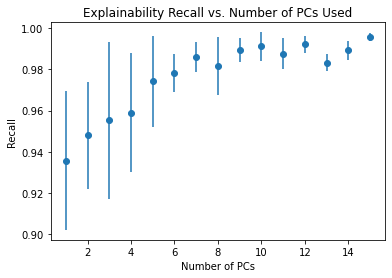

In [23]:
plt.figure(figsize=(6,4))
num_pcs=np.arange(1,16)
#plt.errorbar(num_pcs, precision_fp[0], precision_fp[1], fmt='o')
plt.errorbar(num_pcs, recall_fp[0], recall_fp[1], fmt='o')
plt.xlabel('Number of PCs')
plt.ylabel('Recall')
plt.title('Explainability Recall vs. Number of PCs Used')
plt.savefig('/nobackup/khauskne/kdd/figures/exp_recall_min_stat_new.pdf',format='pdf')

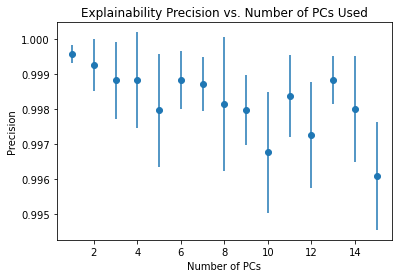

In [24]:
plt.figure(figsize=(6,4))
num_pcs=np.arange(1,16)
plt.errorbar(num_pcs, precision_fp[0], precision_fp[1], fmt='o')
#plt.errorbar(num_pcs, recall_fp[0], recall_fp[1], fmt='o')
plt.xlabel('Number of PCs')
plt.ylabel('Precision')
plt.title('Explainability Precision vs. Number of PCs Used')
plt.savefig('/nobackup/khauskne/kdd/figures/exp_precision_min_stat_new.pdf',format='pdf')

In [25]:
pc_1_mean=summary_statistics(evaluate_mean, 1, 10)[2]
pc_2_mean=summary_statistics(evaluate_mean, 2, 10)[2]
pc_3_mean=summary_statistics(evaluate_mean, 3, 10)[2]
pc_4_mean=summary_statistics(evaluate_mean, 4, 10)[2]
pc_5_mean=summary_statistics(evaluate_mean, 5, 10)[2]
pc_6_mean=summary_statistics(evaluate_mean, 6, 10)[2]
pc_7_mean=summary_statistics(evaluate_mean, 7, 10)[2]
pc_8_mean=summary_statistics(evaluate_mean, 8, 10)[2]
pc_9_mean=summary_statistics(evaluate_mean, 9, 10)[2]
pc_10_mean=summary_statistics(evaluate_mean, 10, 10)[2]
pc_11_mean=summary_statistics(evaluate_mean, 11, 10)[2]
pc_12_mean=summary_statistics(evaluate_mean, 12, 10)[2]
pc_13_mean=summary_statistics(evaluate_mean, 13, 10)[2]
pc_14_mean=summary_statistics(evaluate_mean, 14, 10)[2]
pc_15_mean=summary_statistics(evaluate_mean, 15, 10)[2]

In [26]:

recall_fp_mean=plot_statistics([pc_1_mean,pc_2_mean,pc_3_mean, pc_4_mean, pc_5_mean,pc_6_mean, pc_7_mean, pc_8_mean, 
                            pc_9_mean,pc_10_mean, pc_11_mean, pc_12_mean, pc_13_mean, pc_14_mean , pc_15_mean], 'recall_fp')

precision_fp_mean=plot_statistics([pc_1_mean,pc_2_mean,pc_3_mean, pc_4_mean, pc_5_mean,pc_6_mean, pc_7_mean, pc_8_mean, 
                            pc_9_mean,pc_10_mean, pc_11_mean, pc_12_mean, pc_13_mean, pc_14_mean , pc_15_mean], 'precision_fp')

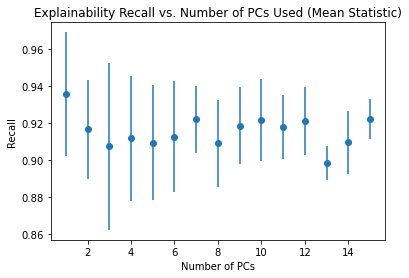

In [27]:
plt.figure(figsize=(6,4))
num_pcs=np.arange(1,16)
#plt.errorbar(num_pcs, precision_fp[0], precision_fp[1], fmt='o')
plt.errorbar(num_pcs, recall_fp_mean[0], recall_fp_mean[1], fmt='o')
plt.xlabel('Number of PCs')
plt.ylabel('Recall')
plt.title('Explainability Recall vs. Number of PCs Used (Mean Statistic)')
plt.savefig('/nobackup/khauskne/kdd/figures/exp_recall_mean_stat_new.pdf',format='pdf')

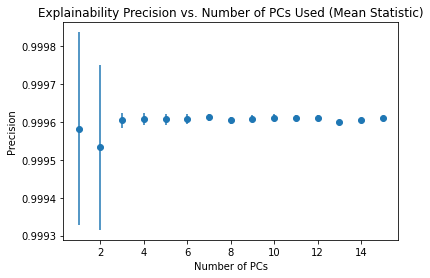

In [28]:
plt.figure(figsize=(6,4))
num_pcs=np.arange(1,16)
#plt.errorbar(num_pcs, precision_fp[0], precision_fp[1], fmt='o')
plt.errorbar(num_pcs, precision_fp_mean[0], precision_fp_mean[1], fmt='o')
plt.xlabel('Number of PCs')
plt.ylabel('Precision')
plt.title('Explainability Precision vs. Number of PCs Used (Mean Statistic)')
plt.savefig('/nobackup/khauskne/kdd/figures/exp_precision_mean_stat_new.pdf',format='pdf')